# Predict House Prices Using Machine Learning Algorithms



### Imports

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

### Data

In [5]:
# 2. Load dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name="Price")

# 3. Explore the data (optional)
print(X.head())
print(y.head())

# 4. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

def eda_california_housing(X, y):
    """
    Perform exploratory data analysis on California Housing dataset.
    X : DataFrame of features
    y : Series of target (house prices)
    """

    # 1. Distribution of target variable
    plt.figure(figsize=(6,4))
    sns.histplot(y, bins=50, kde=True)
    plt.title("Distribution of House Prices")
    plt.xlabel("Price (in 100,000s)")
    plt.ylabel("Frequency")
    plt.show()

    # 2. Histograms of all features
    X.hist(figsize=(15,10), bins=30)
    plt.suptitle("Feature Distributions")
    plt.show()

    # 3. Correlation heatmap
    plt.figure(figsize=(10,6))
    corr_matrix = X.corr()
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Feature Correlation Heatmap")
    plt.show()

    # 4. Correlation of features with target
    plt.figure(figsize=(8,5))
    target_corr = X.corrwith(y).sort_values()
    sns.barplot(x=target_corr.values, y=target_corr.index, palette="viridis")
    plt.title("Correlation of Features with House Price")
    plt.show()

    # 5. Scatter plots of top correlated features
    top_features = target_corr.abs().sort_values(ascending=False).head(3).index
    for col in top_features:
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=X[col], y=y, alpha=0.3)
        plt.title(f"{col} vs House Price")
        plt.xlabel(col)
        plt.ylabel("Price")
        plt.show()

    # 6. Geographical plot: Price
    plt.figure(figsize=(10,6))
    plt.scatter(X["Longitude"], X["Latitude"], c=y, cmap="viridis", s=10, alpha=0.5)
    plt.colorbar(label="House Price")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("California Housing Prices by Location")
    plt.show()

    # 7. Geographical plot: Median Income
    plt.figure(figsize=(10,6))
    plt.scatter(X["Longitude"], X["Latitude"], c=X["MedInc"], cmap="plasma", s=10, alpha=0.5)
    plt.colorbar(label="Median Income")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Median Income by Location")
    plt.show()

    # 8. Median Income vs House Price (hexbin)
    sns.jointplot(data=X.join(y), x="MedInc", y="Price", kind="hex", cmap="magma", height=6)
    plt.suptitle("Median Income vs House Price", y=1.02)
    plt.show()


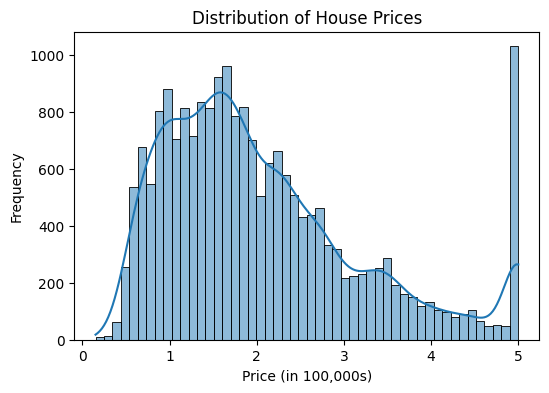

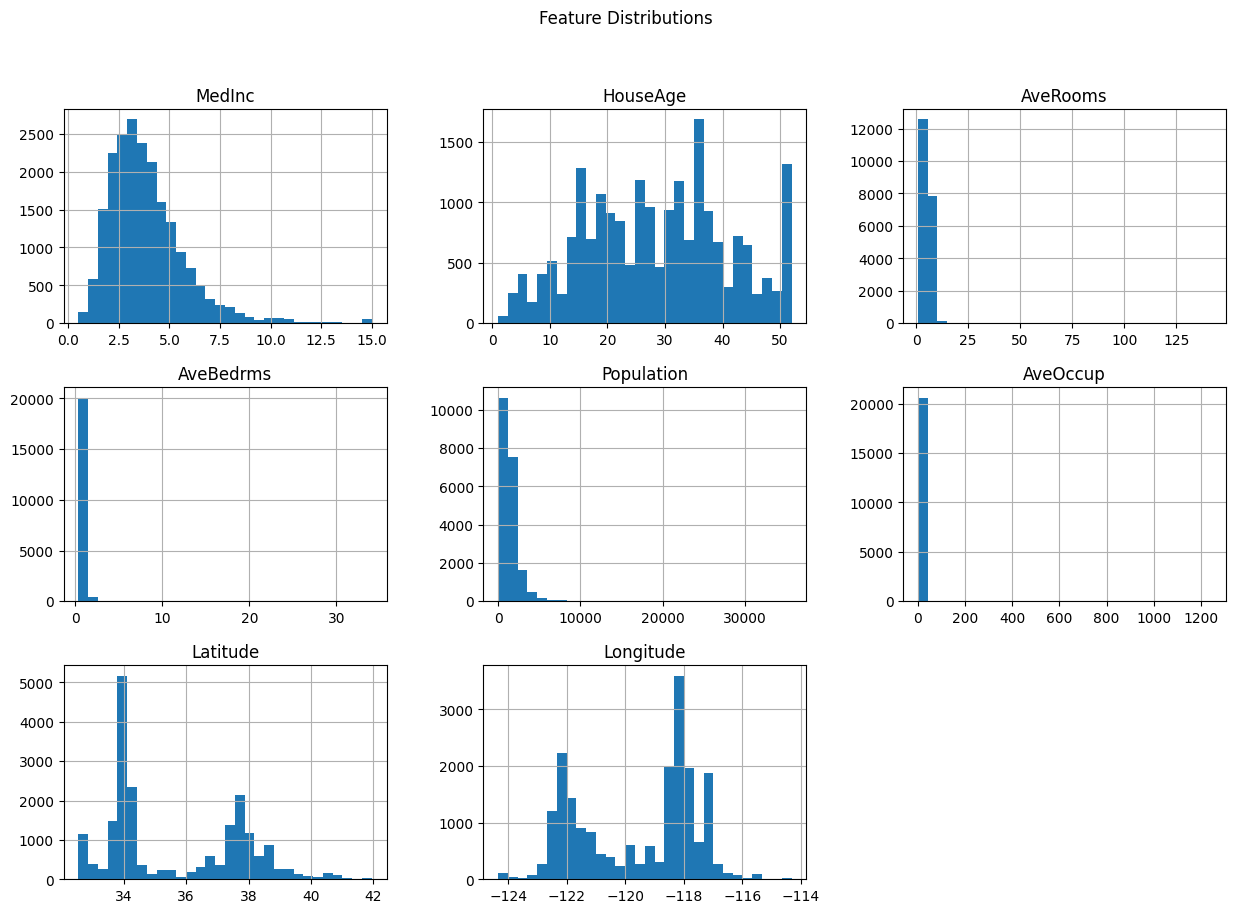

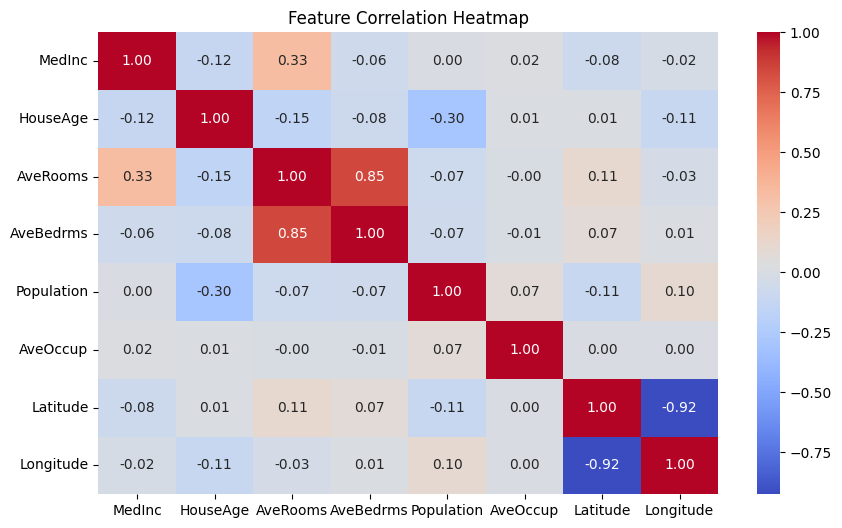

/tmp/ipython-input-2246247919.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.values, y=target_corr.index, palette="viridis")


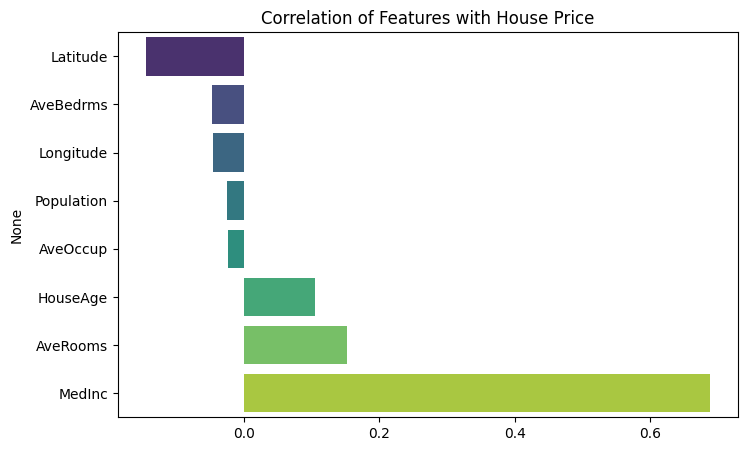

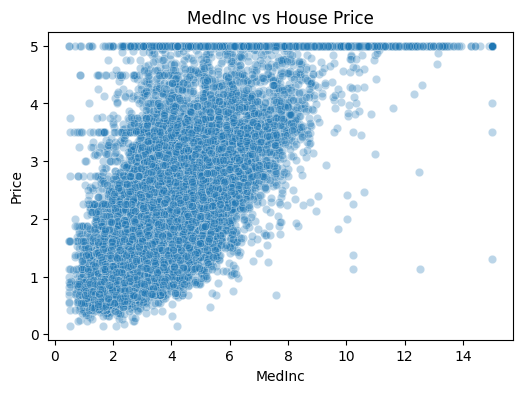

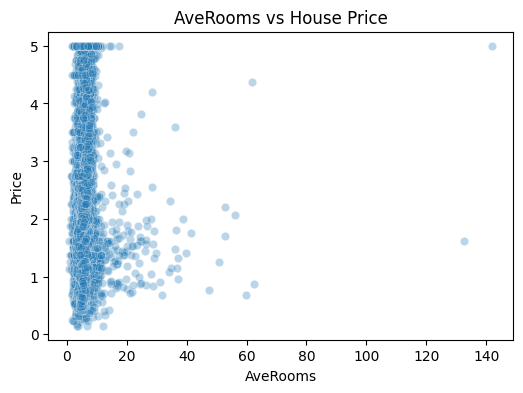

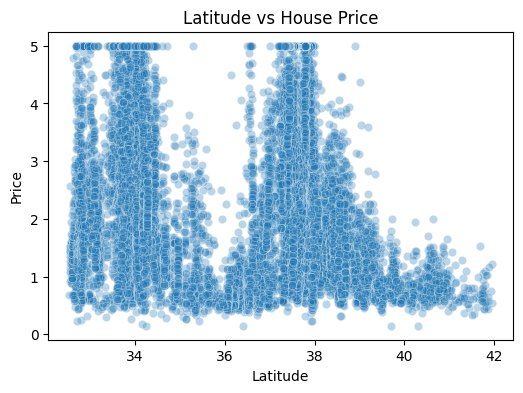

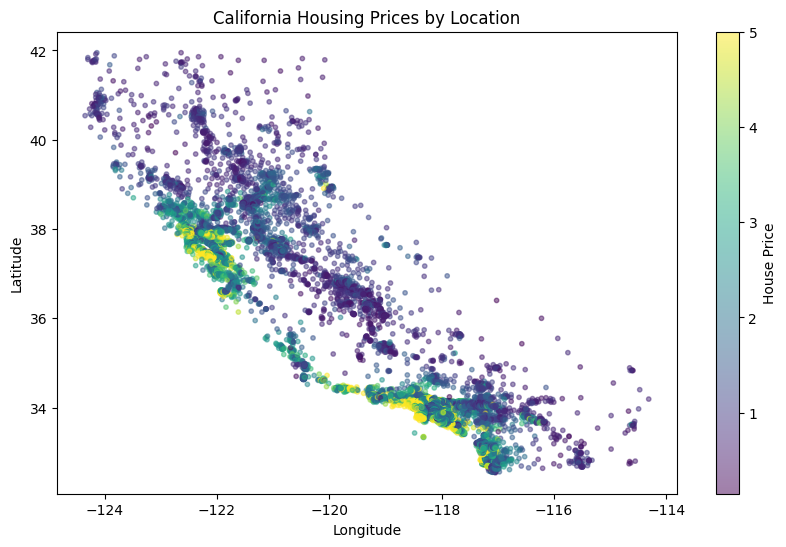

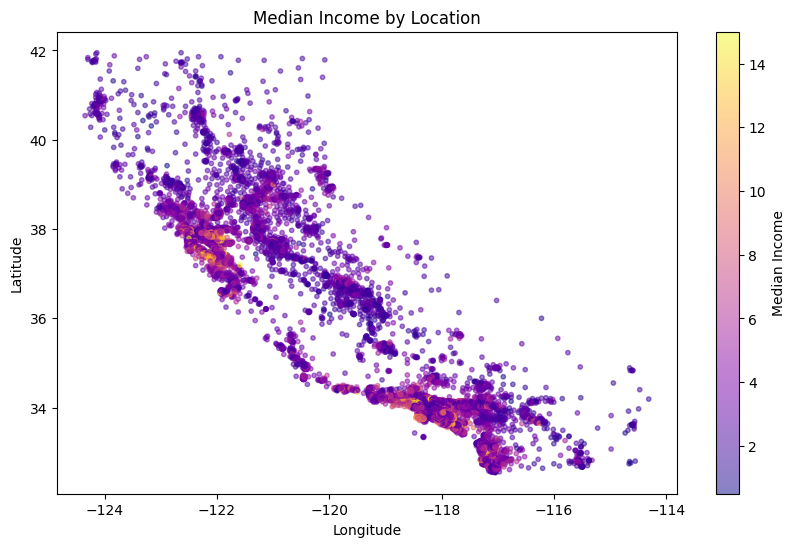

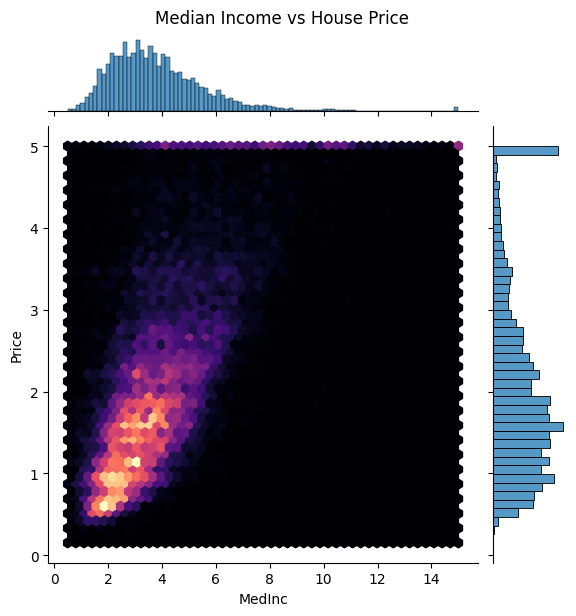

In [7]:
eda_california_housing(X, y)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: make plots look nicer
sns.set(style="whitegrid", palette="muted", font_scale=1.1)


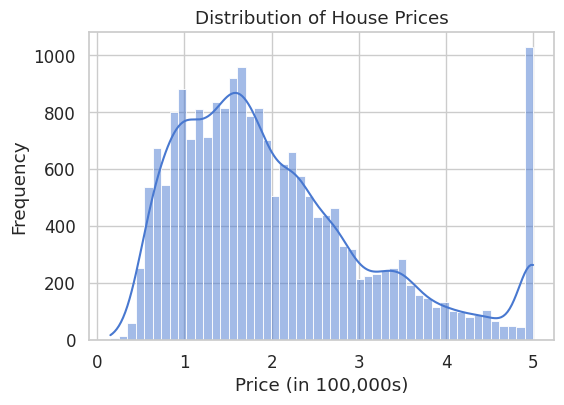

In [9]:
plt.figure(figsize=(6,4))
sns.histplot(y, bins=50, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price (in 100,000s)")
plt.ylabel("Frequency")
plt.show()


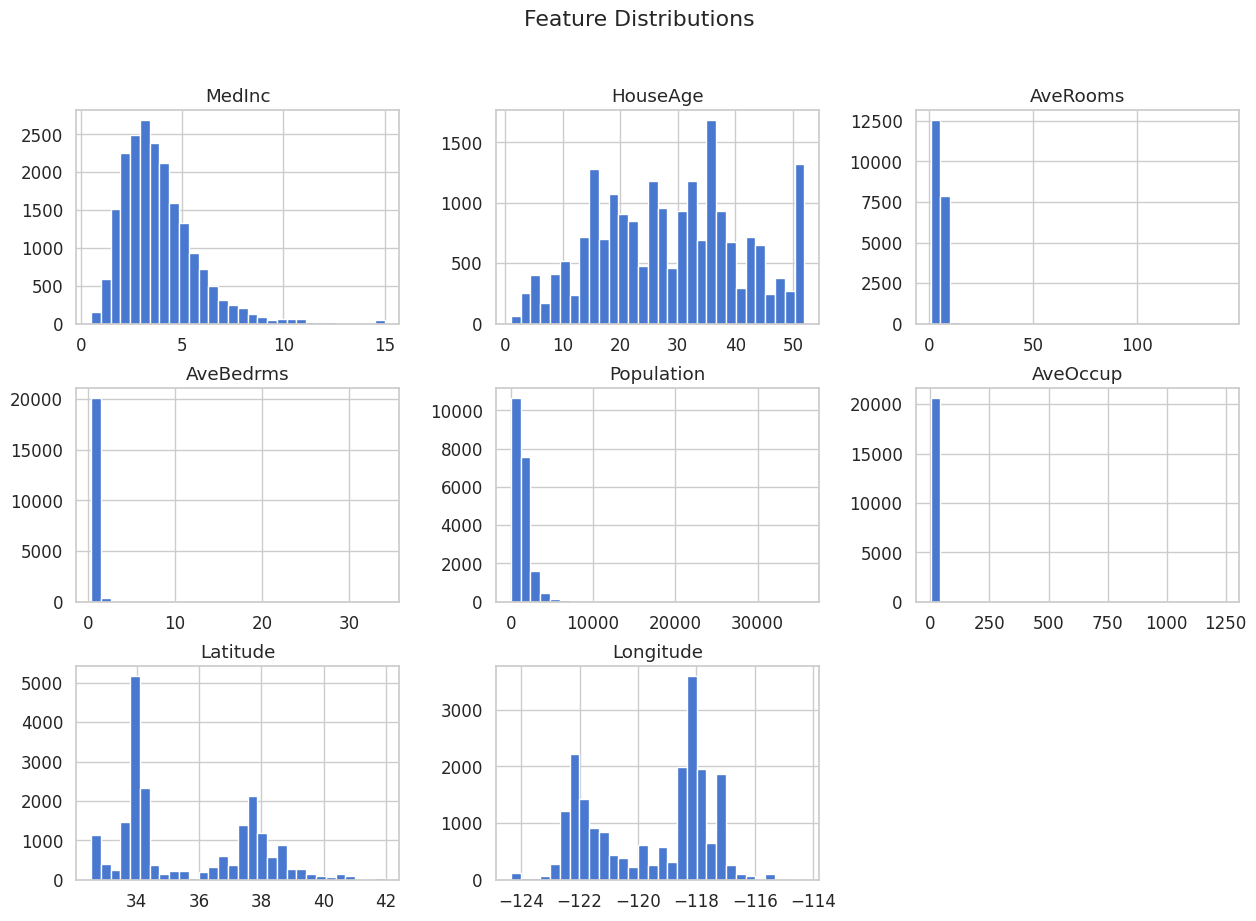

In [10]:
X.hist(figsize=(15,10), bins=30)
plt.suptitle("Feature Distributions")
plt.show()


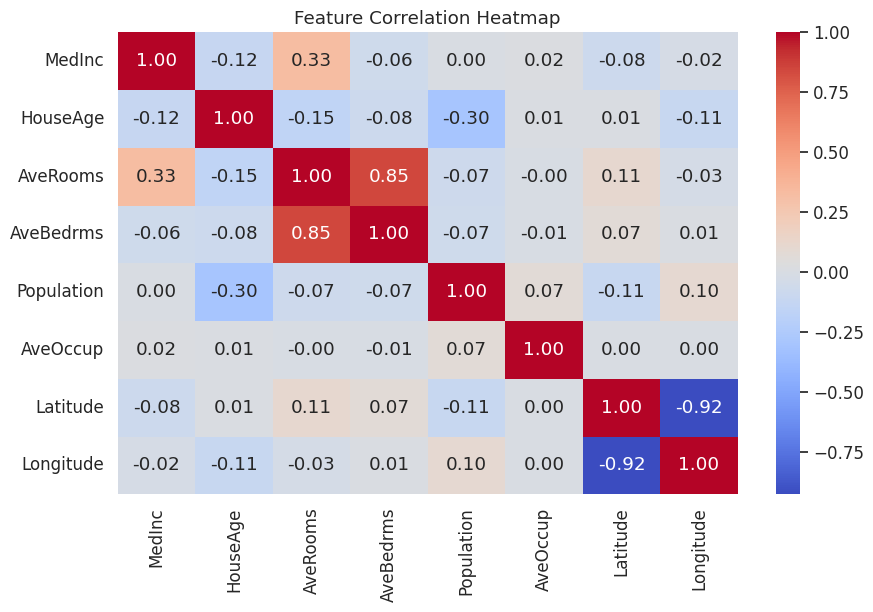

In [11]:
plt.figure(figsize=(10,6))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


/tmp/ipython-input-1591114301.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.values, y=target_corr.index, palette="viridis")


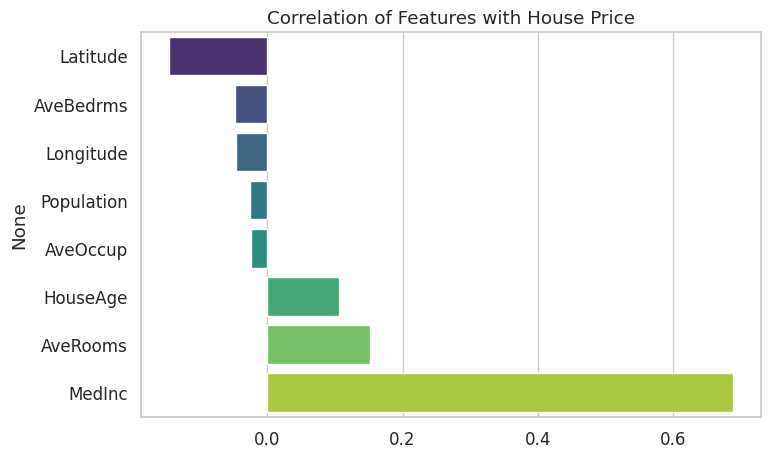

In [12]:
plt.figure(figsize=(8,5))
target_corr = X.corrwith(y).sort_values()
sns.barplot(x=target_corr.values, y=target_corr.index, palette="viridis")
plt.title("Correlation of Features with House Price")
plt.show()


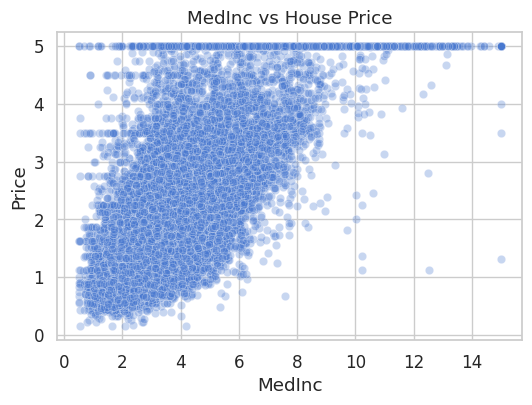

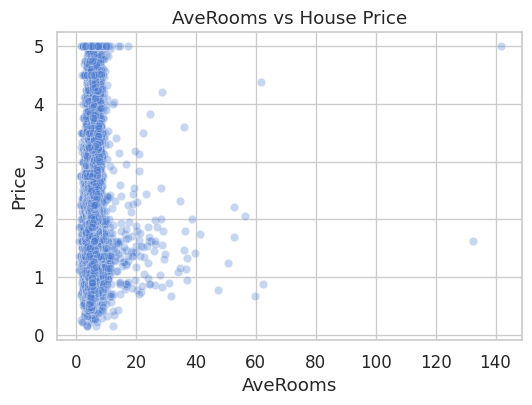

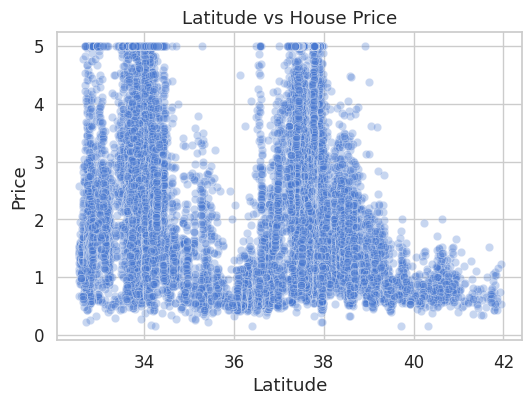

In [14]:
top_features = target_corr.abs().sort_values(ascending=False).head(3).index
for col in top_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=X[col], y=y, alpha=0.3)
    plt.title(f"{col} vs House Price")
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.show()



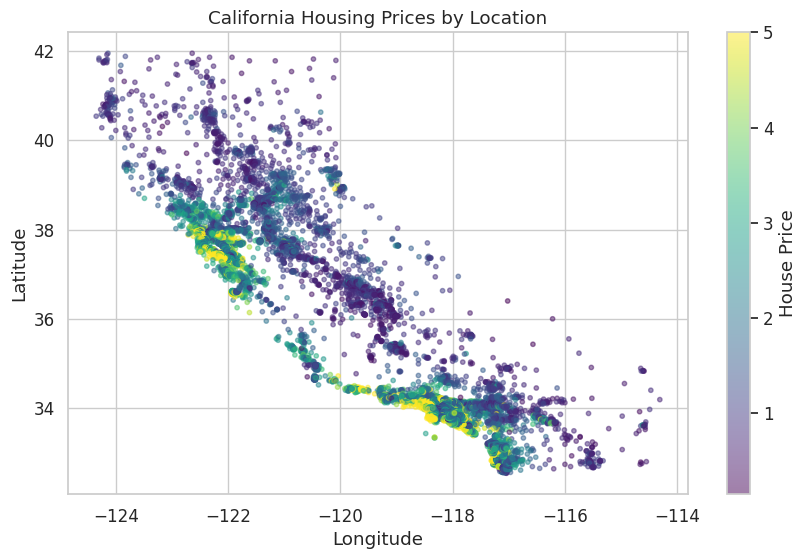

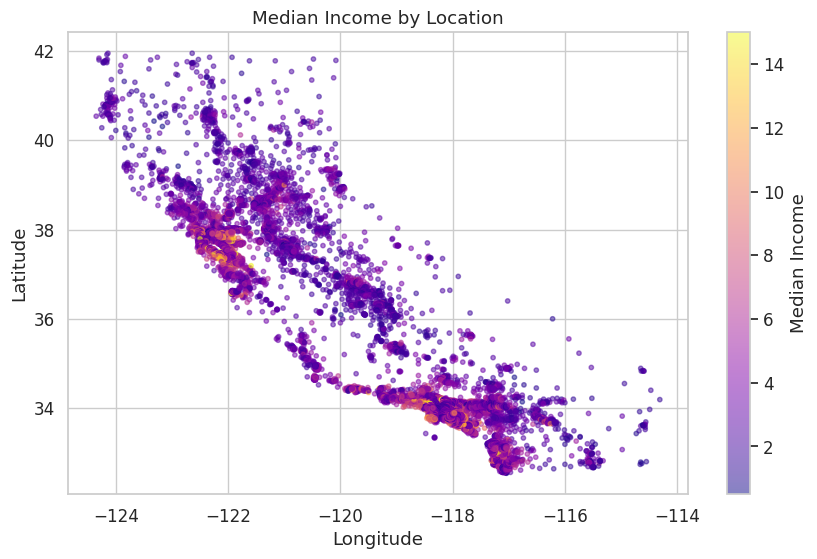

In [15]:
# Price map
plt.figure(figsize=(10,6))
plt.scatter(X["Longitude"], X["Latitude"], c=y, cmap="viridis", s=10, alpha=0.5)
plt.colorbar(label="House Price")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("California Housing Prices by Location")
plt.show()

# Median income map
plt.figure(figsize=(10,6))
plt.scatter(X["Longitude"], X["Latitude"], c=X["MedInc"], cmap="plasma", s=10, alpha=0.5)
plt.colorbar(label="Median Income")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Median Income by Location")
plt.show()


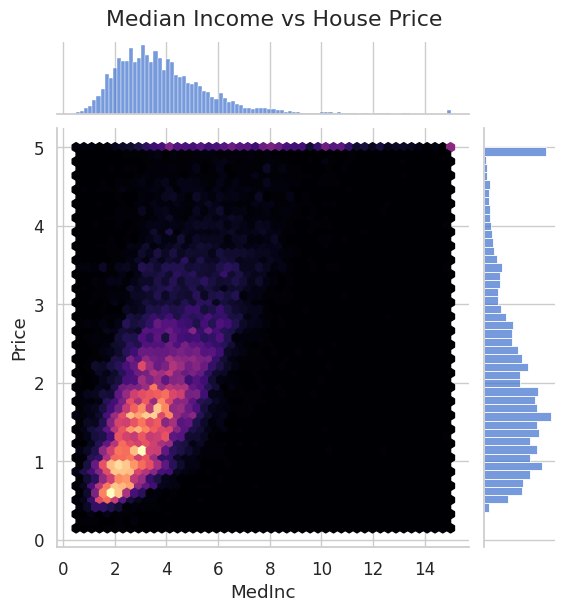

In [16]:
sns.jointplot(data=X.join(y), x="MedInc", y="Price", kind="hex", cmap="magma", height=6)
plt.suptitle("Median Income vs House Price", y=1.02)
plt.show()


### Data Augmentation

In [ ]:
# 5. Feature scaling (optional for tree-based models, but good practice)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



RandomForestRegressor(random_state=42)

### Model

In [ ]:
# 6. Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

### Predict

In [ ]:
# 7. Predict on test set
y_pred = model.predict(X_test_scaled)
y_pred



array([0.5095   , 0.74161  , 4.9232571, ..., 4.7582187, 0.71379  ,
       1.65772  ])

In [ ]:
# 8. Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")



In [ ]:
# 9. Predict a new sample (optional)
sample = X_test.iloc[0].values.reshape(1, -1)
sample_scaled = scaler.transform(sample)
predicted_price = model.predict(sample_scaled)
print(f"Predicted Price for sample: {predicted_price[0]:.3f}")

Predicted Price for sample: 0.509


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
